## Description : 
    The raw network packets of the UNSW-NB 15 dataset was created by the IXIA PerfectStorm tool in the Cyber Range Lab of the Australian Centre for Cyber Security (ACCS) for generating a hybrid of real modern normal activities and synthetic contemporary attack behaviours.

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score

In [6]:
## Custom Functions

In [7]:
### Missing valus Table
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

## 1. Read data set in Data frame

In [7]:
UNSW_NB15 = pd.read_csv("UNSW-NB15.csv")

C:\Users\PC\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
UNSW_NB15_features = pd.read_csv("UNSW-NB15_features.csv")
UNSW_NB15_LIST_EVENTS = pd.read_csv("UNSW-NB15_LIST_EVENTS.csv")

## 2. Identify attributes and class name

##### UNSW_NB15 Dataset has 49 columns and 2539738 records

In [9]:
UNSW_NB15.head()

,59.166.0.3,56716,149.171.126.8,143,tcp,FIN,0.82546002,7812,16236,31,...,0.6,2,7,1,4,1.1,1.2,1.3,Unnamed: 47,0.7
0,59.166.0.0,43467,149.171.126.6,49729,tcp,FIN,0.101815,4238,65628,31,...,0,7,4,1,6,1,1,1,NaN,0
1,59.166.0.5,41289,149.171.126.2,9574,tcp,FIN,0.044003,2750,29104,31,...,0,3,5,3,3,1,1,1,NaN,0
2,59.166.0.9,43785,149.171.126.0,6881,tcp,FIN,2.790830,10476,395734,31,...,0,11,4,3,2,1,1,1,NaN,0
3,59.166.0.8,40691,149.171.126.9,6881,tcp,FIN,2.633500,13350,548216,31,...,0,16,7,7,1,1,1,1,NaN,0
4,59.166.0.3,20393,149.171.126.3,5190,tcp,FIN,0.115048,1958,2308,31,...,0,2,6,1,4,1,1,1,NaN,0


In [10]:
UNSW_NB15.describe()

,56716,143,0.82546002,7812,16236,31,29,30,32,75090.25,...,0.5,0.6,2,7,1,4,1.1,1.2,1.3,0.7
count,2.539738e+06,2.539738e+06,2.539738e+06,2.539738e+06,2.539738e+06,2.539738e+06,2.539738e+06,2.539738e+06,2.539738e+06,2.539738e+06,...,2.539738e+06,2.539738e+06,2.539738e+06,2.539738e+06,2.539738e+06,2.539738e+06,2.539738e+06,2.539738e+06,2.539738e+06,2.539738e+06
mean,3.053692e+04,1.123510e+04,6.588633e-01,4.340071e+03,3.643202e+04,6.278151e+01,3.077044e+01,5.164537e+00,1.633142e+01,3.694929e+07,...,1.735336e-02,2.056039e-02,9.207915e+00,8.989884e+00,6.439729e+00,6.901641e+00,4.642573e+00,3.593033e+00,6.846560e+00,1.265024e-01
std,2.044121e+04,1.843820e+04,1.392577e+01,5.640941e+04,1.611053e+05,7.462671e+01,4.285193e+01,2.251837e+01,5.659790e+01,1.186042e+08,...,1.334651e-01,1.843731e-01,1.083708e+01,1.082282e+01,8.162331e+00,8.205342e+00,8.478002e+00,6.174759e+00,1.125880e+01,3.324148e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.123100e+04,5.300000e+01,1.037000e-03,2.000000e+02,1.780000e+02,3.100000e+01,2.900000e+01,0.000000e+00,0.000000e+00,1.353775e+05,...,0.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
50%,3.169000e+04,8.000000e+01,1.586400e-02,1.470000e+03,1.820000e+03,3.100000e+01,2.900000e+01,3.000000e+00,4.000000e+00,5.893038e+05,...,0.000000e+00,0.000000e+00,5.000000e+00,5.000000e+00,3.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00
75%,4.743900e+04,1.497000e+04,2.147538e-01,3.182000e+03,1.490800e+04,3.100000e+01,2.900000e+01,7.000000e+00,1.400000e+01,2.038365e+06,...,0.000000e+00,0.000000e+00,1.000000e+01,1.000000e+01,6.000000e+00,7.000000e+00,2.000000e+00,1.000000e+00,5.000000e+00,0.000000e+00
max,6.553500e+04,6.553500e+04,8.786638e+03,1.435577e+07,1.465753e+07,2.550000e+02,2.540000e+02,5.319000e+03,5.507000e+03,5.988000e+09,...,4.000000e+00,8.000000e+00,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.000000e+01,6.700000e+01,1.000000e+00


#### UNSW_NB15_features 48 features and 1 label

In [11]:
UNSW_NB15_features

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,Indicates to the state and its dependent proto...
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


####  208 UNSW_NB15_LIST_EVENTS

In [12]:
UNSW_NB15_LIST_EVENTS

,Attack category,Attack subcategory,Number of events
0,normal,NaN,2218761
1,Fuzzers,FTP,558
2,Fuzzers,HTTP,1497
3,Fuzzers,RIP,3550
4,Fuzzers,SMB,5245
5,Fuzzers,Syslog,1851
6,Fuzzers,PPTP,1583
7,Fuzzers,FTP,248
8,Fuzzers,DCERPC,164
9,Fuzzers,OSPF,993


## Create DataFrame With names and data values

In [24]:
cols = list(UNSW_NB15_features["Name"].values)

In [25]:
# datas = UNSW_NB15.rename(columns)
# type(UNSW_NB15)

In [31]:
data = pd.DataFrame(UNSW_NB15.to_numpy(), columns=cols)

In [4]:
data.to_csv("labeled_UNSW_NB15.csv")

In [2]:
data = pd.read_csv("labeled_UNSW_NB15.csv")

C:\Users\PC\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data = data.drop('Unnamed: 0', axis=1)

In [4]:
data.describe()

,sport,dsport,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Sload,...,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,Label
count,2.539738e+06,2.539738e+06,2.539738e+06,2.539738e+06,2.539738e+06,2.539738e+06,2.539738e+06,2.539738e+06,2.539738e+06,2.539738e+06,...,2.539738e+06,2.539738e+06,2.539738e+06,2.539738e+06,2.539738e+06,2.539738e+06,2.539738e+06,2.539738e+06,2.539738e+06,2.539738e+06
mean,3.053692e+04,1.123510e+04,6.588633e-01,4.340071e+03,3.643202e+04,6.278151e+01,3.077044e+01,5.164537e+00,1.633142e+01,3.694929e+07,...,1.735336e-02,2.056039e-02,9.207915e+00,8.989884e+00,6.439729e+00,6.901641e+00,4.642573e+00,3.593033e+00,6.846560e+00,1.265024e-01
std,2.044121e+04,1.843820e+04,1.392577e+01,5.640941e+04,1.611053e+05,7.462671e+01,4.285193e+01,2.251837e+01,5.659790e+01,1.186042e+08,...,1.334651e-01,1.843731e-01,1.083708e+01,1.082282e+01,8.162331e+00,8.205342e+00,8.478002e+00,6.174759e+00,1.125880e+01,3.324148e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.123100e+04,5.300000e+01,1.037000e-03,2.000000e+02,1.780000e+02,3.100000e+01,2.900000e+01,0.000000e+00,0.000000e+00,1.353775e+05,...,0.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
50%,3.169000e+04,8.000000e+01,1.586400e-02,1.470000e+03,1.820000e+03,3.100000e+01,2.900000e+01,3.000000e+00,4.000000e+00,5.893038e+05,...,0.000000e+00,0.000000e+00,5.000000e+00,5.000000e+00,3.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00
75%,4.743900e+04,1.497000e+04,2.147538e-01,3.182000e+03,1.490800e+04,3.100000e+01,2.900000e+01,7.000000e+00,1.400000e+01,2.038365e+06,...,0.000000e+00,0.000000e+00,1.000000e+01,1.000000e+01,6.000000e+00,7.000000e+00,2.000000e+00,1.000000e+00,5.000000e+00,0.000000e+00
max,6.553500e+04,6.553500e+04,8.786638e+03,1.435577e+07,1.465753e+07,2.550000e+02,2.540000e+02,5.319000e+03,5.507000e+03,5.988000e+09,...,4.000000e+00,8.000000e+00,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.000000e+01,6.700000e+01,1.000000e+00


### 3 Describe Statistics of the data

#### Missing Values

In [18]:
missing_zero_values_table(data)

Your selected dataframe has 49 columns and 2539738 Rows.
There are 1 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
attack_cat,0,2218455,87.3,2218455,87.3,object


* Here 'attack_cat' has 2218455 N/A values but

In [19]:
UNSW_NB15_LIST_EVENTS.iloc[0]

Attack category        normal
Attack subcategory        NaN
Number of events      2218761
Name: 0, dtype: object

#### According to UNSW_NB15_LIST_EVENTS, NaN is a refferd to  Attack category as normal so it cannot be counted as missing values

#### Histogram

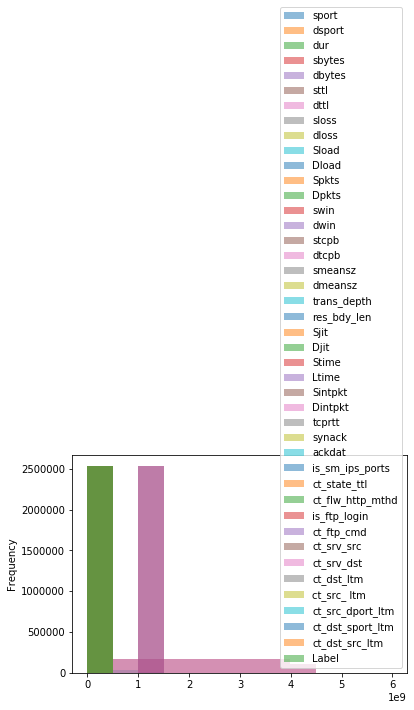

In [45]:
ax = data.plot.hist(bins=12, alpha=0.5)

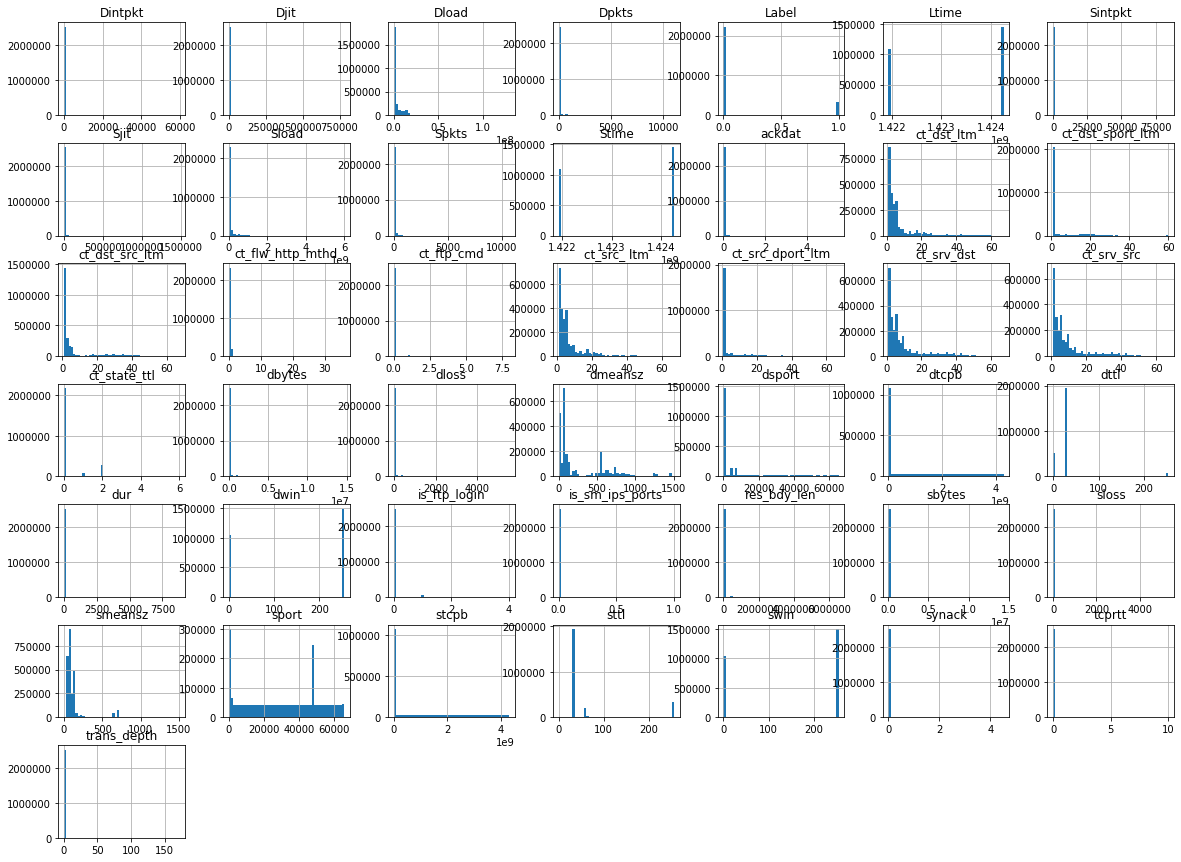

In [46]:
data.hist(bins=50, figsize=(20,15))
plt.show()

#### Label

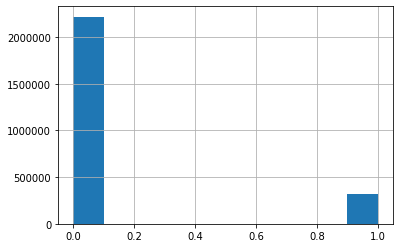

In [35]:
data["Label"].hist()
plt.show()

In [36]:
data["Label"].value_counts()

0    2218455
1     321283
Name: Label, dtype: int64

## The dataset is highly skewed
* 0 - 2218455
* 1 - 321283

### 4. Apply Data Cleaning

In [8]:
corr_matrix = data.corr()

In [9]:
corr_matrix["Label"].sort_values(ascending=False)

Label               1.000000
sttl                0.904411
ct_state_ttl        0.873695
ct_dst_src_ltm      0.439904
ct_dst_sport_ltm    0.419045
ct_src_dport_ltm    0.396737
ct_srv_dst          0.386492
ct_srv_src          0.382990
ct_src_ ltm         0.343228
ct_dst_ltm          0.339446
Ltime               0.275696
Stime               0.275696
Sload               0.192315
ackdat              0.143439
tcprtt              0.143104
dttl                0.134921
synack              0.122248
Sjit                0.020957
sbytes              0.010177
dur                 0.001957
Dintpkt            -0.010634
is_sm_ips_ports    -0.015479
Sintpkt            -0.019002
ct_flw_http_mthd   -0.026571
res_bdy_len        -0.027343
trans_depth        -0.029052
ct_ftp_cmd         -0.029660
is_ftp_login       -0.031828
sloss              -0.043283
Djit               -0.054430
smeansz            -0.065364
dbytes             -0.075554
dloss              -0.095869
Dpkts              -0.115965
Spkts         

#### We can clearly see correlations for label at more than |0.3| are

* sttl               ( 0.904411 )
* ct_state_ttl       ( 0.873695 )
* ct_dst_src_ltm     ( 0.439904 )
* ct_dst_sport_ltm   ( 0.419045 )
* ct_src_dport_ltm   ( 0.396737 )
* ct_srv_dst         ( 0.386492 )
* ct_srv_src         ( 0.382990 )
* ct_src_ ltm        ( 0.343228 )
* ct_dst_ltm         ( 0.339446 )
* dwin               (-0.314005 )
* swin               (-0.315194 )

So other features may not be lot effected to final prediction so we can ommit them

In [5]:
attributes = ['sttl',
'ct_state_ttl',
'ct_dst_src_ltm',
'ct_dst_sport_ltm',
'ct_src_dport_ltm',
'ct_srv_dst',
'ct_srv_src',
'ct_src_ ltm',
'ct_dst_ltm',
'dwin',
'swin']
# scatter_matrix(data[attributes], figsize=(12, 8))

### 5. Make Feature vector through combining all features in a single vector

In [6]:
data_cleaned = data.filter( attributes, axis=1)
label = data["Label"]

### 6. Apply Normalization - Min-max scaling

In [7]:
X = data_cleaned
y = label

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X=X)

### 7. Split the data into test and train dataset

* 80% for train 
* 20% for test

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split( X_scaled, y, test_size=0.2, random_state=42)

### 8. Check if data is imbalance

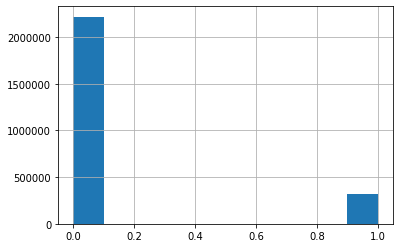

In [17]:
data["Label"].hist()
plt.show()

In [18]:
label.value_counts()

0    2218455
1     321283
Name: Label, dtype: int64

In [16]:
size = len(y)
v0 = label.value_counts()[0]
v1 = label.value_counts()[1]
print("0 values percentage = {:.2f} %".format(v0/size *100))
print("1 values percentage = {:.2f} %".format(v1/size *100))

0 values percentage = 87.35 %
1 values percentage = 12.65 %


#### So the dataset is  imbalenced

### 9. Apply Balancing Ratio

In [19]:
 from imblearn.under_sampling import NearMiss

Using TensorFlow backend.


In [21]:
# # Implementing undersampling for handling imbalanced
# nm = NearMiss()
# X_res, y_res = nm.fit_resample(X, y)
# X_res.shape

### 10. Experiment on various feature selection and note down its effect on overall accuracy of the classification.

### 11.Building Classification models and note down their accuracy

### 12.Evaluating the Model 

### 13.Test and predict


# SGDClassifier

In [22]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

#### Cross Validation

In [26]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.97361443, 0.97829647, 0.97812371])

In [29]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

#### Confusio Matrix

In [32]:
q = confusion_matrix(y_train, y_train_pred)
print(q)

[[1751935   22282]
 [  25103  232470]]


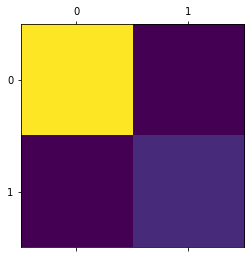

In [33]:
#Confusion Metrix
# q = confusion_matrix(y_test, svc_clf_predict)
plt.matshow(q)
plt.show()

## After this potint I will use this function to get accuracy values

In [11]:
#After this potint I will use this function to get accuracy values
def accuracy_test(clf, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
    clf.fit(X_train, y_train)
    predict = clf.predict(X_test)
    score = accuracy_score(y_test, predict)
    print("Accuaracy = {}".format(score))
    q = confusion_matrix(y_test, predict)
    print("Confusion Matrix....\n")
    print(q)
    plt.matshow(q)
    plt.show()
#     return score

### Stochastic Gradient Descent Classier

Accuaracy = 0.9731921377778828
Confusion Matrix....

[[439658   4580]
 [  9037  54673]]


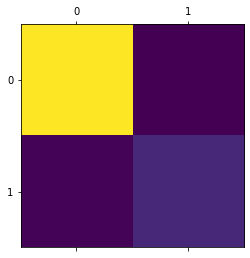

0.9731921377778828

In [20]:
# Stochastic Gradient Descent Classier

from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
accuracy_test(sgd_clf)

### Random Forest Classier

Accuaracy = 0.9912392607117264
Confusion Matrix....

[[441960   2278]
 [  2172  61538]]


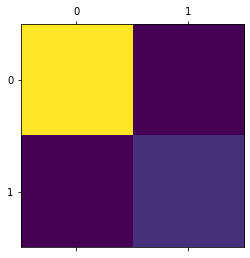

0.9912392607117264

In [21]:
# Random Forest Classier

from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=100, criterion = 'entropy')
accuracy_test(rnd_clf)

###  KNeighbors Classifier

Accuaracy = 0.9789210706607763
Confusion Matrix....

[[438121   6117]
 [  4590  59120]]


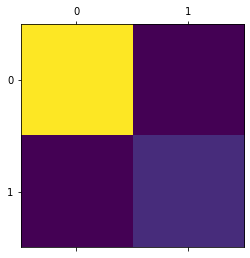

In [12]:
# KNeighborscClassifier

from sklearn.neighbors import KNeighborsClassifier
KNN_clf = KNeighborsClassifier()
accuracy_test(KNN_clf)

### Let's try with scaled values

### Stochastic Gradient Descent Classier (Scaled)

Accuaracy = 0.9789210706607763
Confusion Matrix....

[[438121   6117]
 [  4590  59120]]


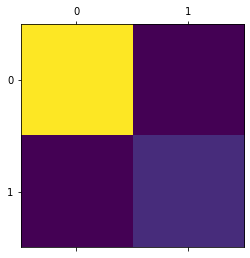

0.9789210706607763

In [24]:
# Stochastic Gradient Descent Classier

from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
accuracy_test(sgd_clf, X_train=X_train_scaled, X_test = X_test_scaled)

### Random Forest Classier (Scaled)

Accuaracy = 0.991172324726153
Confusion Matrix....

[[441981   2257]
 [  2227  61483]]


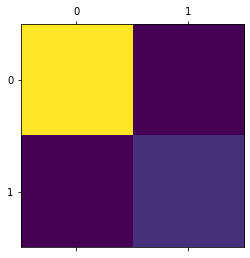

0.991172324726153

In [26]:
# Random Forest Classier

from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=100, criterion = 'entropy')
accuracy_test(rnd_clf, X_train=X_train_scaled, X_test = X_test_scaled)

### KNeighbors Classifier (Scaled)

Accuaracy = 0.9789210706607763
Confusion Matrix....

[[438121   6117]
 [  4590  59120]]


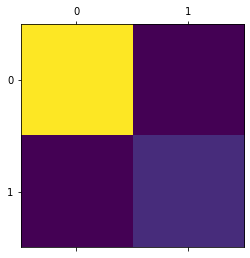

In [13]:
# KNeighbors Classifier


KNN_clf = KNeighborsClassifier()
accuracy_test(KNN_clf, X_train=X_train_scaled, X_test = X_test_scaled)

In [ ]:
#####################################################################################################################

# Conclusion:
* We can clearly see the 0 (normals) are more likely to be predicted correctly than 1 (attacks)
* Scaled dataset does not improve the results